# Initial data

Group work by: C.M. Allevi E.L.Goria S.Mucedola O.B.Rossi F.Tettoni

```
./treecode in=in_data.txt out=out_data.txt dtime=0.03 eps=11.17 theta=0.1 tstop=50 dtout=0.1 >log.txt
```

We hereby present a simulation of a selfsimilar collapsing homogeneous (isothermal) sphere.

## Initial Data
To better understand the choice of our initial datas, we first have to show the conversion we used to go from Internal Units to the cgs system.<br>
From the definition of *centripetal force*<br><br>
$$ f_\text{cp} = \dfrac{v^2}{r} = \dfrac{GM}{r^2}$$
<br>
we define the following *adimensional quantity* for our conversion
<br><br>
$$ \bigg(\dfrac{GM}{rv^2}\bigg)_\text{iu} = \bigg(\dfrac{GM}{rv^2}\bigg)_\text{cgs} $$
<br>
Since the quantity is derived from the centripetal force we decided to use the mass ratios and distance from the Earth-Sun system, interpreting $m_\text{iu} = 1 = 1\ M_\odot$. From which

$$
\dfrac{m_\text{cgs}}{m_\text{iu}} = 2 \times 10^{33} \qquad \dfrac{r_\text{cgs}}{r_\text{iu}} = 1.49 \times 10^{13}
$$

From which we find
$$
\dfrac{v_\text{cgs}}{v_\text{iu}} = 3 \times 10^6\
$$

In addition to what was requested by the direct Nbody code, the tree code requires two parameters:
- $\theta_\text{acc}$ is the accuracy parameter, it is defined as the lowest distance two particles can have in our simulation. It is related to the numerical approximation error on the interacting force between particles, the formula is
$$ 2\theta_\text{acc} = \dfrac{\Delta F_i}{F_i} $$
- $\varepsilon$ is the softening parameter, it's defined as
$$\varepsilon = \bigg(\dfrac{V}{N}\bigg)^{\frac{1}{3}}$$
    it defines a dampening term which enters in the equation of the force as
    
    $$ |f_{ij}| = \text{G}\ \dfrac{m_i}{|\vec{r_i} - \vec{r_j}|^2 + \varepsilon^2}\$$
    
    we will use it to eliminate the strong force interactions that could occour in the collapse.<br>
    
- $dt$ is the timestep of integration, a lower value gives a more accurate estimate of the particles positions

### Intepreting the data
The initial data set that we have chosen to simulate a self-collapsing sphere is the following, expressed in internal units:
We have set up the total time of the simulation to be of 50 IU (this will vary) and the ouput to be printed every 0.01 UI, to have enough data to be confronted with the theoretical model. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm.notebook import tqdm

#config plot
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=True)
%config InlineBackend.figure_format='retina'

/home/sam/miniconda3/compiler_compat/ld: warning: libgfortran.so.5, needed by /usr/lib64/libblas.so, not found (try using -rpath or -rpath-link)
/home/sam/miniconda3/compiler_compat/ld: /tmp/tmpiv7yn20r/tmp/tmpiv7yn20r/source.o: in function `main':
source.c:(.text.startup+0x50): undefined reference to `cblas_ddot'
/home/sam/miniconda3/compiler_compat/ld: /usr/lib64/libblas.so: undefined reference to `_gfortran_stop_string@GFORTRAN_8'
/home/sam/miniconda3/compiler_compat/ld: /usr/lib64/libblas.so: undefined reference to `_gfortran_st_write@GFORTRAN_8'
/home/sam/miniconda3/compiler_compat/ld: /usr/lib64/libblas.so: undefined reference to `_gfortran_string_len_trim@GFORTRAN_8'
/home/sam/miniconda3/compiler_compat/ld: /usr/lib64/libblas.so: undefined reference to `_gfortran_transfer_character_write@GFORTRAN_8'
/home/sam/miniconda3/compiler_compat/ld: /usr/lib64/libblas.so: undefined reference to `_gfortran_transfer_integer_write@GFORTRAN_8'
/home/sam/miniconda3/compiler_compat/ld: /usr/lib

The power of the treecode allows us to run simulations with high number of particles, we chose to run the majority of our simulations with 3000 particles, but this will change.

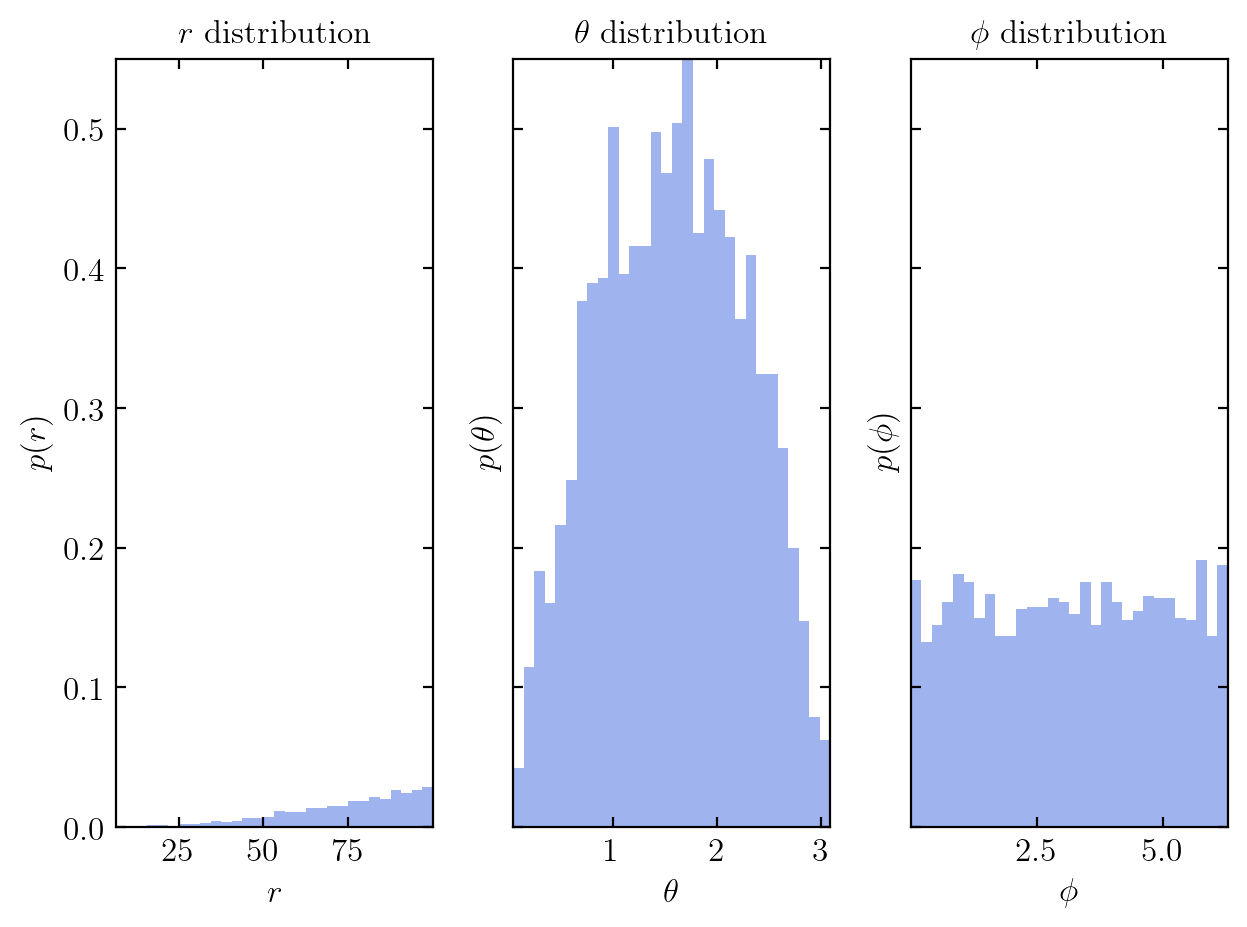

In [2]:
# generating initial points
N = int(3e3)

a = 100 #sphere radius

I = lambda x: a*x**(1/3)
I_theta = lambda x: np.arccos(1-2*x)

P = np.random.uniform(0,1,N) #the two probabilities must have different 
P_theta = np.random.uniform(0,1,N) #seed otherwise there's a correlation between them
r = I(P)
theta = I_theta(P_theta)
phi = np.random.uniform(0, 2*np.pi, N)


fig, axs = plt.subplots(1,3, tight_layout=True, sharey=True)
axs[0].set(title = fr'$r$ distribution', xlabel = r'$r$', ylabel = r'$p(r)$')
axs[0].hist(r, bins = 30, density = True, alpha = .5, color='royalblue', lw = 0)
axs[1].set(title = fr'$\theta$ distribution', xlabel = r'$\theta$', ylabel = r'$p(\theta)$' )
axs[1].hist(theta, bins = 30, density = True, alpha = .5, color='royalblue', lw = 0)
axs[2].set(title = fr'$\phi$ distribution', xlabel = r'$\phi$', ylabel = r'$p(\phi)$' )
axs[2].hist(phi, bins = 30, density = True, alpha = .5, color='royalblue', lw = 0);

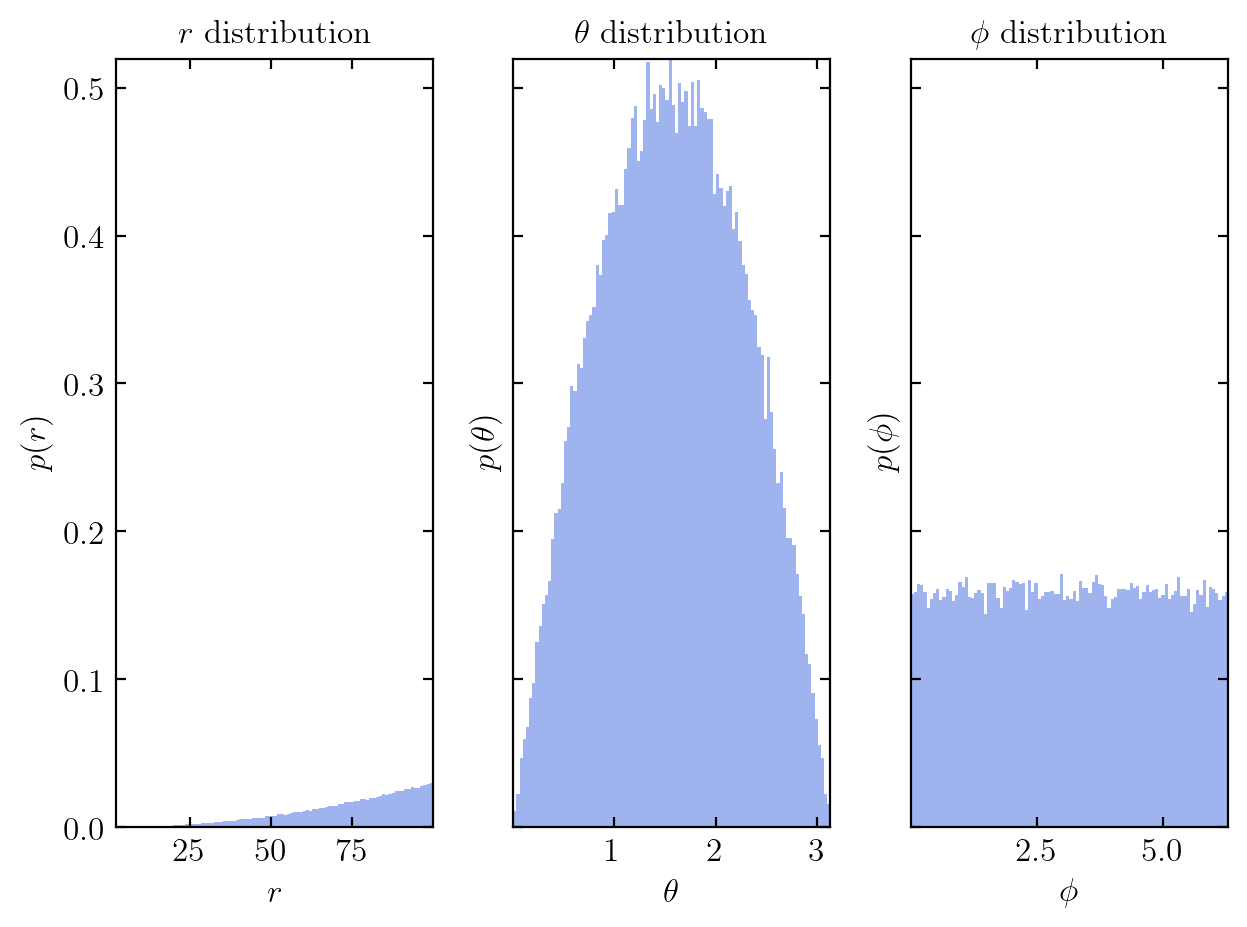

In [3]:
x = r*np.sin(theta)*np.cos(phi)
y = r*np.sin(theta)*np.sin(phi)
z = r*np.cos(theta)

N_m = int(1e5)
P_m = np.random.uniform(0,1,N_m)
P_theta_m = np.random.uniform(0,1,N_m)

r_m = I(P_theta_m)
theta_m = I_theta(P_m)
phi_m = np.random.uniform(0, 2*np.pi, N_m)


fig, axs = plt.subplots(1,3, tight_layout=True, sharey=True)
axs[0].set(title = fr'$r$ distribution', xlabel = r'$r$', ylabel = r'$p(r)$')
axs[0].hist(r_m, bins = 100, density = True, alpha = .5, color='royalblue', lw = 0)
axs[1].set(title = fr'$\theta$ distribution', xlabel = r'$\theta$', ylabel = r'$p(\theta)$' )
axs[1].hist(theta_m, bins = 100, density = True, alpha = .5, color='royalblue', lw = 0)
axs[2].set(title = fr'$\phi$ distribution', xlabel = r'$\phi$', ylabel = r'$p(\phi)$')
axs[2].hist(phi_m, bins = 100, density = True, alpha = .5, color='royalblue', lw = 0);

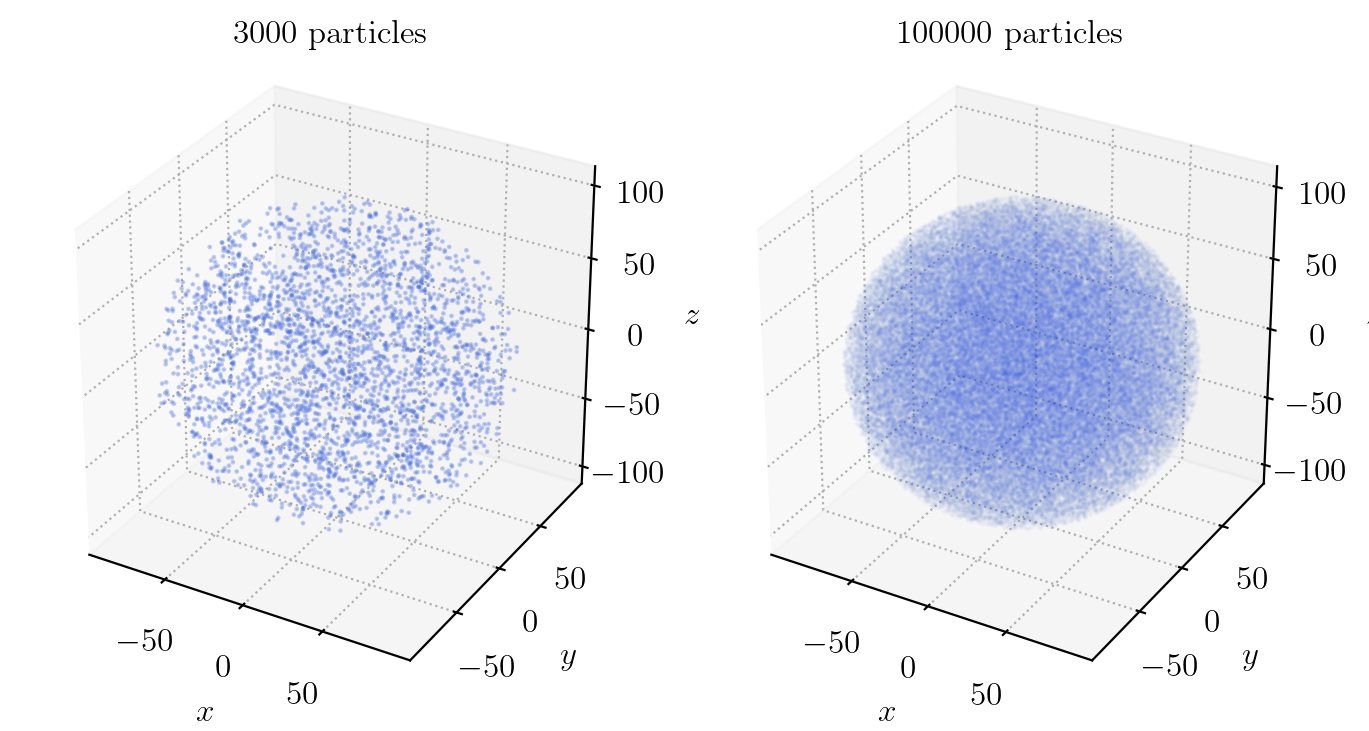

In [4]:
x_m = r_m*np.sin(theta_m)*np.cos(phi_m)
y_m = r_m*np.sin(theta_m)*np.sin(phi_m)
z_m = r_m*np.cos(theta_m)


fig, axs = plt.subplots(1,2, figsize = (7,7), tight_layout = True, subplot_kw={'projection': '3d'})
axs[0].set(aspect='equal', title = f'{N} particles', xlabel = r'$x$', ylabel = r'$y$', zlabel = r'$z$')
axs[0].scatter(x,y,z, s = .5, color='royalblue', alpha = .3)
axs[1].set(aspect='equal', title = f'{N_m} particles', xlabel = r'$x$', ylabel = r'$y$', zlabel = r'$z$')
axs[1].scatter(x_m,y_m,z_m, s =.5, color='royalblue', alpha = .025);

Density is compatible with a delta function for 89.80%.


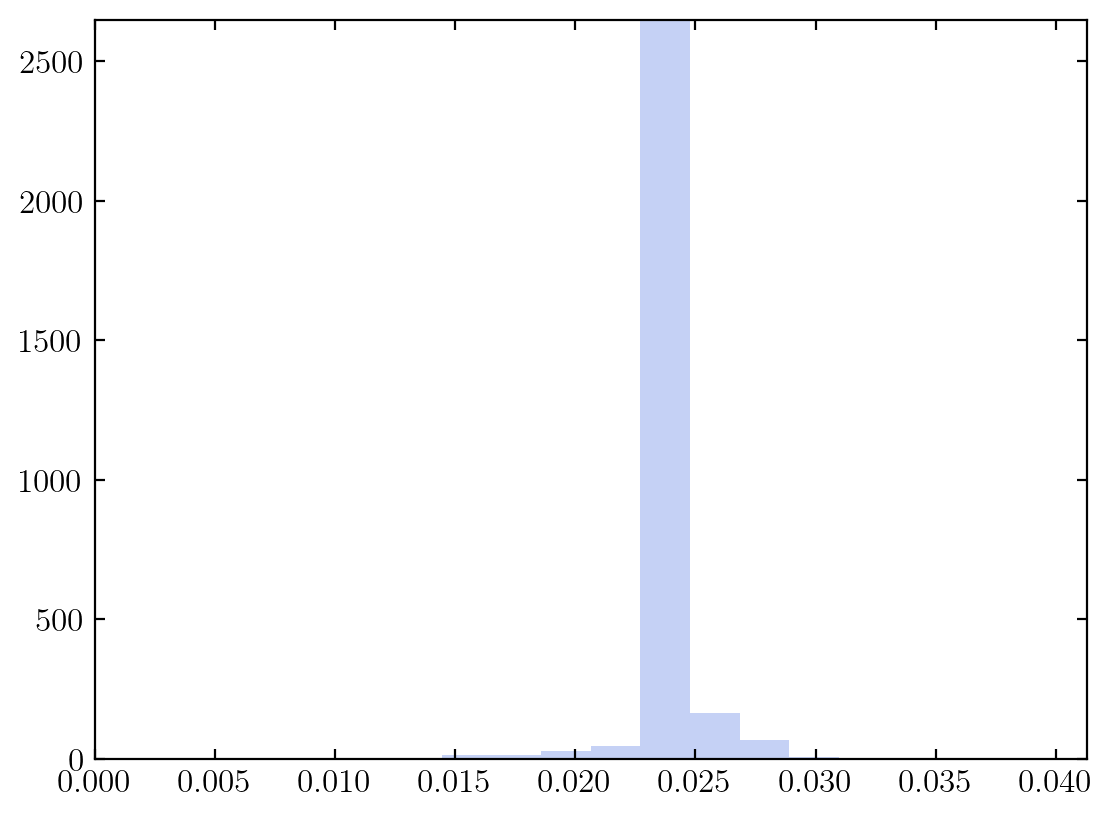

In [5]:
#Checking density
steps = 3000
scan = np.linspace(2, a, steps)
volume = 0
density = []

for i in scan:
    volume = (4/3) * np.pi * (i**3)
    mask = tuple([r_m <= i])
    new_r = r_m[mask]
    number = len(new_r)
    density.append(number/volume)

density = np.array(density)
counts, bins = np.histogram(density)
plt.hist(density, bins=20, color = 'royalblue', alpha = .3, lw = 0)
max = np.max(counts)
prob = max/steps
print('Density is compatible with a delta function for {:.2f}%.'.format(prob*100));

In [45]:
#softening
V = (4/3)*np.pi*a**3
eps = (V/N)**(1/3)

print(eps)

11.17692795479829


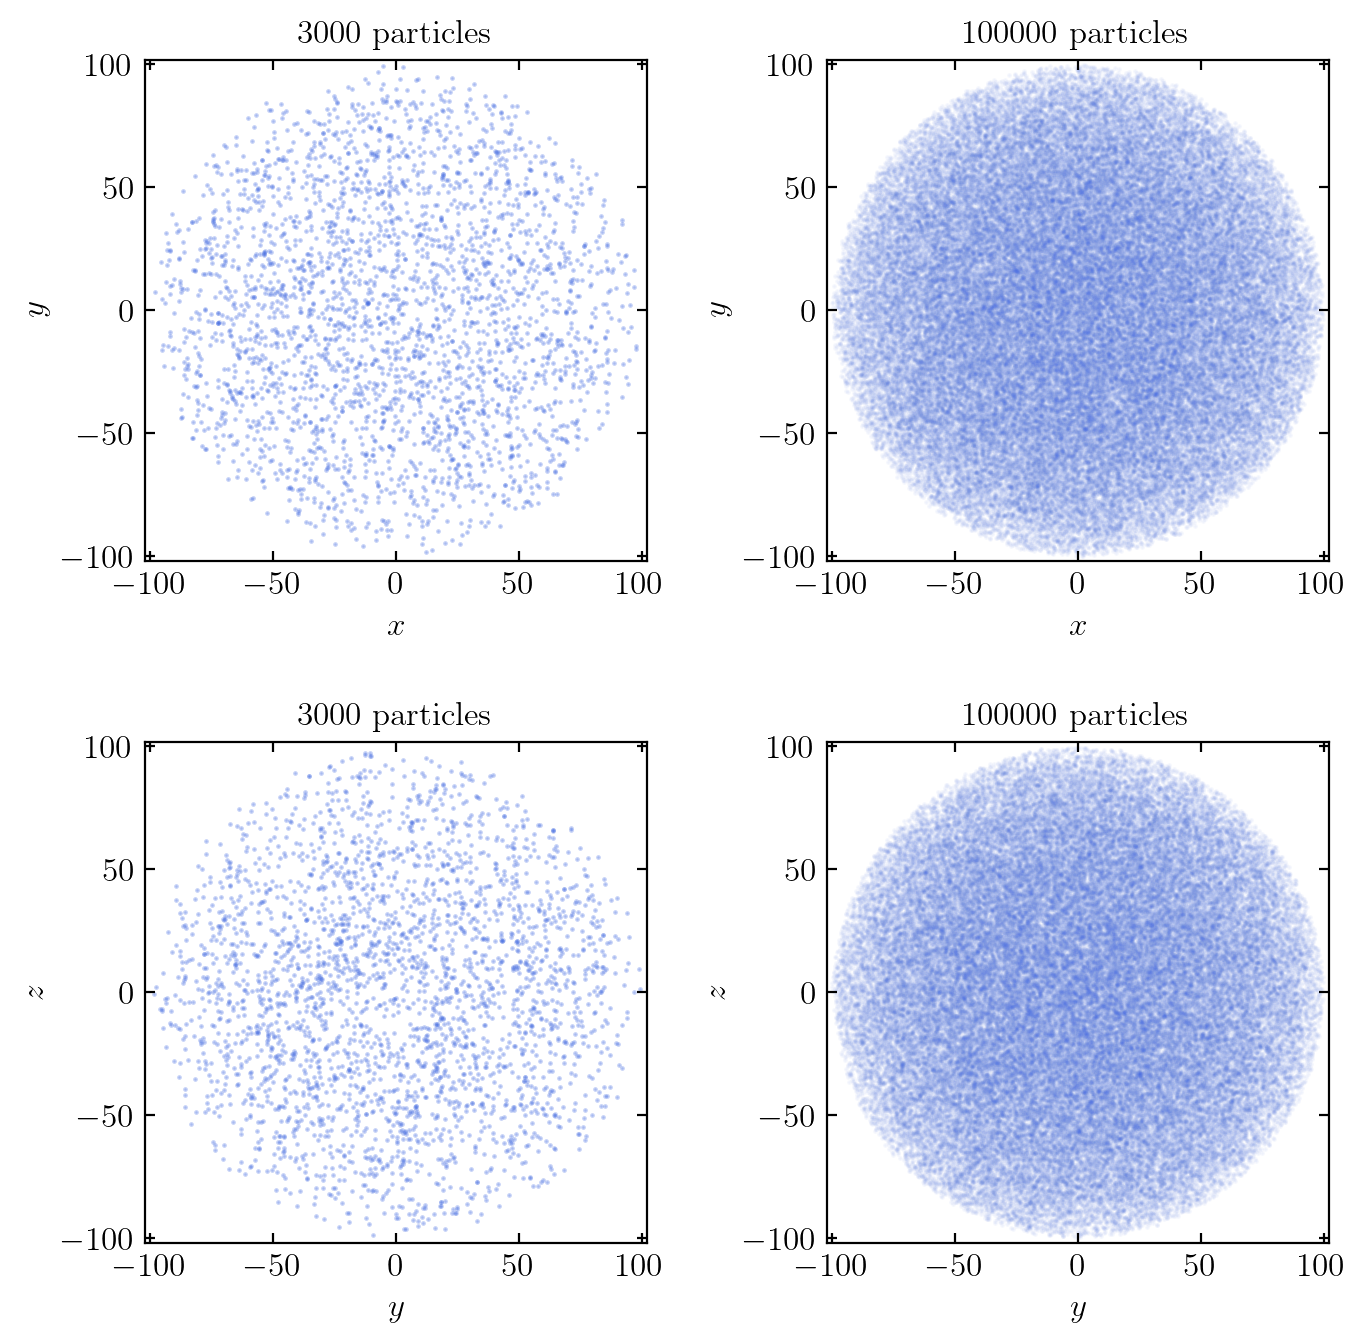

In [46]:
fig, axs = plt.subplots(2,2, figsize = (7,7), tight_layout = True)

for j in range(2):
    axs[0,j].set(xlabel = r'$x$', ylabel = r'$y$')
    axs[1,j].set(xlabel = r'$y$', ylabel = r'$z$')
    for i in range(2):
        axs[i,j].set(aspect='equal', xlim = [-a-2, a+2], ylim = [-a-2, a+2])
        axs[i,0].set(title = f'{N} particles')  
        axs[i,1].set(title = f'{N_m} particles')
    
axs[0,0].scatter(x,y, s = .5, color='royalblue', alpha = .3)
axs[1,0].scatter(y,z, s = .5, color='royalblue', alpha = .3)
axs[0,1].scatter(x_m,y_m, s = .5, color='royalblue', alpha =.05)
axs[1,1].scatter(y_m,z_m, s = .5, color='royalblue', alpha =.05);

In [47]:
# creating the input file
m = np.zeros(N)
dim = 3

for k in range(N):
    m[k] = .5

with open ('tree/in_data.txt', 'w+') as f:
    f.write(str(N) + '\n')
    f.write(f'{dim}' + '\n')
    f.write('0' + '\n')
    for m_i in m:
        f.write(f'{m_i}' + '\n')
    for i in range(N):
        f.write(f'{x[i]} {y[i]} {z[i]}' + '\n')
    for j in range(N):
        f.write(f'0 0 0' + '\n')

# Fetching

The output of the treecode is ever so slightly different from the direct nbody. So we adjust the data fetching accordingly.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm

In [8]:
lines = pd.read_csv('tree/out_data.txt', names = list(range(3)), sep = '\s+')
N = int(3e3)
N_particles = N
s = N*3+3

t = np.array([lines.iloc[2::s,0].copy().dropna()]).flatten()

m = np.array([lines.iloc[i::s,0].copy().dropna() for i in range(3, N+3)])
x = np.array([lines.iloc[i::s,0].copy().dropna() for i in range(N+3, 2*N+3)])
y = np.array([lines.iloc[i::s,1].copy().dropna() for i in range(N+3, 2*N+3)])
z = np.array([lines.iloc[i::s,2].copy().dropna() for i in range(N+3, 2*N+3)])
vx = np.array([lines.iloc[i::s,0].copy().dropna() for i in range(2*N+3, 3*N+3)])
vy = np.array([lines.iloc[i::s,1].copy().dropna() for i in range(2*N+3, 3*N+3)])
vz = np.array([lines.iloc[i::s,2].copy().dropna() for i in range(2*N+3, 3*N+3)])

In [9]:
print(x)

[[-25.09828   -25.098032  -25.097519  ...  13.151004   13.144625
   13.138959 ]
 [-46.508129  -46.507595  -46.506493  ...  14.979632   14.847181
   14.745579 ]
 [ -8.9014883  -8.9014921  -8.9014997 ...  12.815569   13.065096
   13.251852 ]
 ...
 [-11.417199  -11.417046  -11.416728  ... -17.77235   -17.907763
  -18.009373 ]
 [  9.7095022   9.7093849   9.7091436 ...  24.577217   24.569195
   24.554714 ]
 [ 22.983671   22.983488   22.98311   ... -60.982594  -61.330593
  -61.591393 ]]


In [10]:
print(x.shape)

(3000, 501)


# Dynamical properties
We start with a quick calculation of the center of mass position and distance from the origin.

In [11]:
r = np.sqrt(x**2 + y**2 + z**2)
print(r.shape)

(3000, 501)


In [23]:
it = len(t)

x_cm = np.zeros(it)
y_cm = np.zeros(it)
z_cm = np.zeros(it)

for i in range(it):
    M = np.sum(m[:,i])
    x_cm[i] = np.sum(x[:, i]*m[:, i])/M
    y_cm[i] = np.sum(y[:, i]*m[:, i])/M
    z_cm[i] = np.sum(z[:, i]*m[:, i])/M

r_cm = np.sqrt((x - x_cm)**2 + (y - y_cm)**2 + (z -z_cm)**2)
d_o = np.sqrt((x_cm- x_cm[0])**2 + (y_cm - y_cm[0])**2 + (z_cm - z_cm[0])**2)

print(f"The maximum displacement from the initial center of mass position is: {round(np.max(d_o), 5)}")

The maximum displacement from the initial center of mass position is: 0.00208



<img src="simulations/3e3particles_t=50/cm.gif" width="500" align="left">
<br><br><br><br><br><br>

We ran a quick test to see if the center of mass was moving from its initial position, but we saw that the displacement was neglegible.

Then, we decided to estimate the free fall time and the dynamical time for the collapse. The result does not quite match with the simulation.

free fall time: 28.68
dynamical time: 40.56


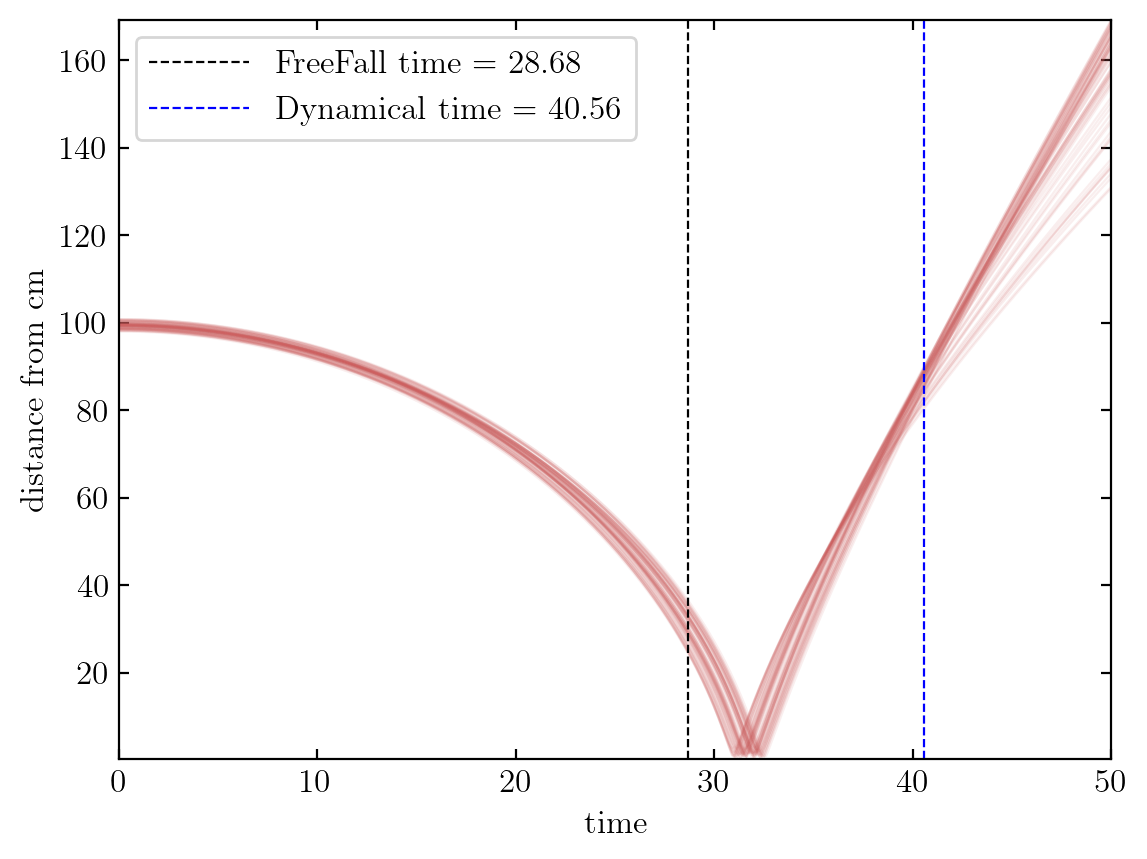

In [30]:
a = 100

r = np.sqrt(x**2 + y**2 + z**2)
r_i = r[:,0]                                 #i take all points at time 0
mask = (r_i >= a-1) & (r_i <= a+1)         #i take only the external ones at time 0

r_ext_cm = r_cm[mask, :]                           #i take the external ones at all times 
r_ext = r[mask, :]                           #i take the external ones at all times 

#r[0,:] is the same particle at all times 
#r[:,0] is all particles at a specific time
num_points = len(r_i[mask])

for i in range(num_points):
    #plt.plot(t, r_ext[i,:],  c='royalblue', lw = .8, alpha = .1)        #Not corrected
    plt.plot(t, r_ext_cm[i,:],  c='indianred', lw = .8, alpha = .1)     #Corrected for CM

rho = M/((4/3)*np.pi*a**3)
G = 1
t_ff = np.sqrt((3*np.pi)/(32*G*rho))

t_ff = np.sqrt((3*np.pi)/(32*G*rho))
t_dyn = np.sqrt(3*np.pi/(16*G*rho))
print(f'free fall time: {round(t_ff,2)}')
print(f'dynamical time: {round(t_dyn,2)}')


plt.axvline(t_ff, color = 'black', ls = '--', lw = .8, label=f'FreeFall time = {round(t_ff, 2)}')
plt.axvline(t_dyn, color = 'blue', ls = '--', lw = .8, label=f'Dynamical time = {round(t_dyn, 2)}')
plt.ylabel('distance from cm')
plt.xlabel('time')
plt.legend()
plt.show()

## Softening and accuracy parameter

We ran a few simulations changing the softening parameter three times: the intrinsic one, an higher one and a lower one. We saw that the structure tends to eject particles with higher velocity in the lower case, while in the higher one, the dampening of the gravitational force allows a second collapse.

In addition to this, one could then show how the softening enters the force evaluation.

<img src="simulations/3e3particles_t=50/sphere.gif" width="450" align="left">
<img src="simulations/3e3particles_t=50_nosoft/sphere.gif" width="450" align="left">

In [11]:
import pandas as pd

### softening
lines = pd.read_csv('simulations/3e3particles_t=50/out_data.txt', names = list(range(3)), sep = '\s+')
N = int(3e3)
N_particles = N
s = N*3+3

t_s = np.array([lines.iloc[2::s,0].copy().dropna()]).flatten()

m_s = np.array([lines.iloc[i::s,0].copy().dropna() for i in range(3, N+3)])
x_s = np.array([lines.iloc[i::s,0].copy().dropna() for i in range(N+3, 2*N+3)])
y_s = np.array([lines.iloc[i::s,1].copy().dropna() for i in range(N+3, 2*N+3)])
z_s = np.array([lines.iloc[i::s,2].copy().dropna() for i in range(N+3, 2*N+3)])
vx_s = np.array([lines.iloc[i::s,0].copy().dropna() for i in range(2*N+3, 3*N+3)])
vy_s = np.array([lines.iloc[i::s,1].copy().dropna() for i in range(2*N+3, 3*N+3)])
vz_s = np.array([lines.iloc[i::s,2].copy().dropna() for i in range(2*N+3, 3*N+3)])


#nosoftening
lines = pd.read_csv('simulations/3e3particles_t=50_nosoft/out_data.txt', names = list(range(3)), sep = '\s+')
t = np.array([lines.iloc[2::s,0].copy().dropna()]).flatten()

m = np.array([lines.iloc[i::s,0].copy().dropna() for i in range(3, N+3)])
x = np.array([lines.iloc[i::s,0].copy().dropna() for i in range(N+3, 2*N+3)])
y = np.array([lines.iloc[i::s,1].copy().dropna() for i in range(N+3, 2*N+3)])
z = np.array([lines.iloc[i::s,2].copy().dropna() for i in range(N+3, 2*N+3)])
vx = np.array([lines.iloc[i::s,0].copy().dropna() for i in range(2*N+3, 3*N+3)])
vy = np.array([lines.iloc[i::s,1].copy().dropna() for i in range(2*N+3, 3*N+3)])
vz = np.array([lines.iloc[i::s,2].copy().dropna() for i in range(2*N+3, 3*N+3)])

In [12]:
def dist(x1, x2, y1, y2, z1, z2):
    d = np.sqrt((x1 - x2)**2 + (y1 - y2)**2 + (z1 - z2)**2)
    return d

In [21]:
f_s = np.zeros((N,len(t_s)))
f = np.zeros((N,len(t_s)))

for i in tqdm(range(len(t_s))):
    for j in range(1,N):
        d_s = dist(x_s[0,i], x_s[j,i], y_s[0,i], y_s[j,i], z_s[0,i], z_s[j,i])
        d = dist(x[0,i], x[j,i], y[0,i], y[j,i], z[0,i], z[j,i])
        f_s[j,i] = m_s[0,i]/(d_s)
        f[j,i] = m_s[0,i]/(d)
    

#    f_i = m[0,i]/(dist(x[0,i], x[1:,i], y[0,i], y[1:,i], z[0,i], z[1:,i]))

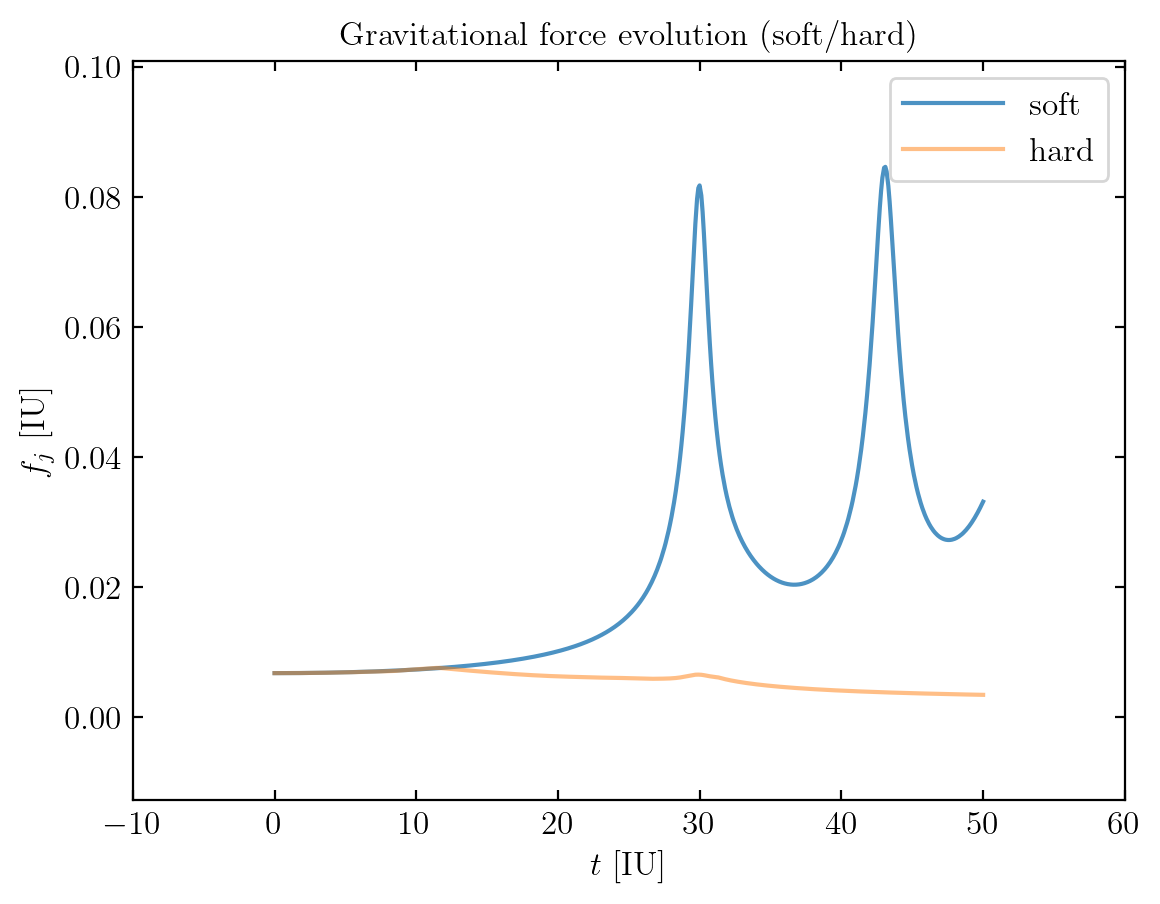

In [14]:
p = 69

plt.plot(t_s, f_s[p,:], label="soft", alpha = .8)
plt.plot(t_s, f[p,:], label= "hard", alpha =.5)
plt.title("Gravitational force evolution (soft/hard)")
plt.xlabel(r'$t$ [IU]')
plt.ylabel(r'$f_j$ [IU]')
plt.margins(.2)
plt.legend();

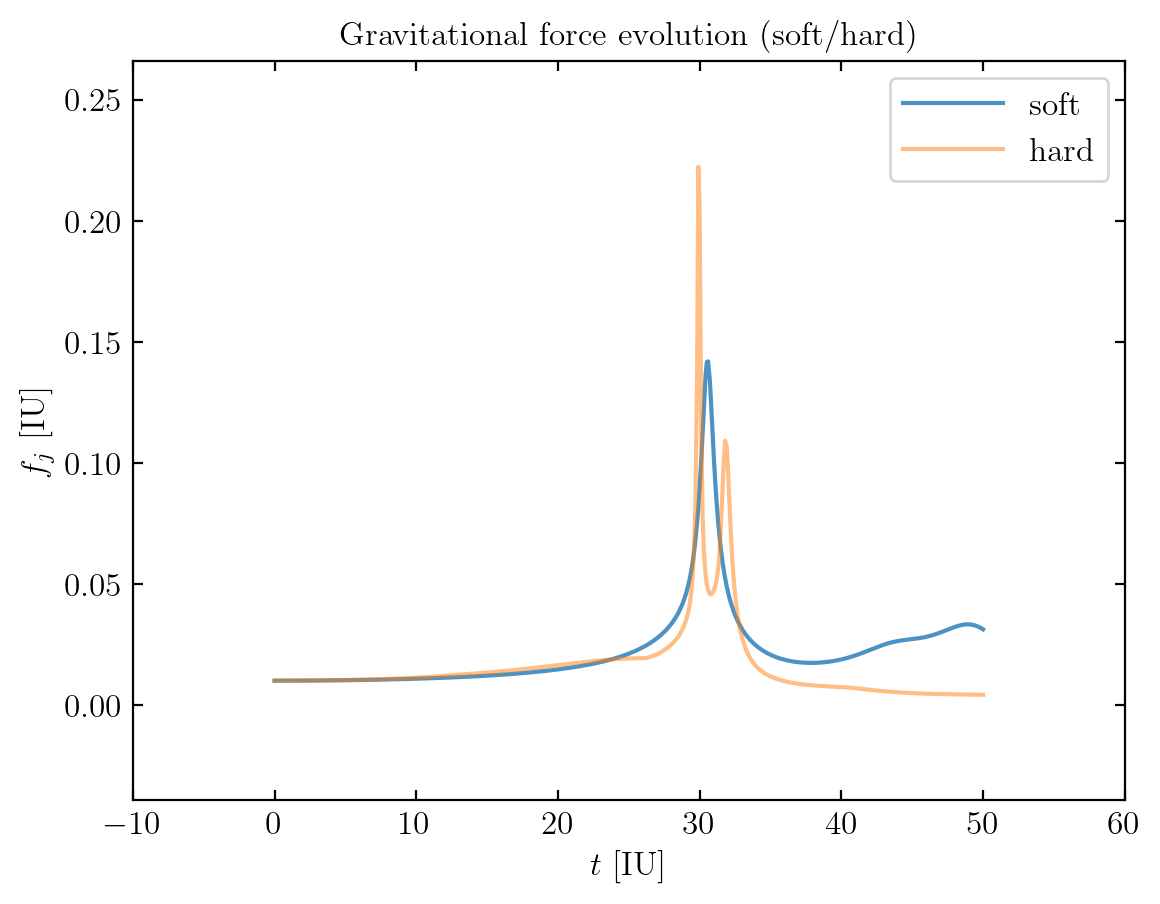

In [15]:
p = 340

plt.plot(t_s, f_s[p,:], label="soft", alpha = .8)
plt.plot(t_s, f[p,:], label= "hard", alpha =.5)
plt.title("Gravitational force evolution (soft/hard)")
plt.xlabel(r'$t$ [IU]')
plt.ylabel(r'$f_j$ [IU]')
plt.margins(.2)
plt.legend();

We haven't observed a remarkable change in the accuracy parameter. A further analysis could be done on the force acting on a certain particle. One could then compare it with the exact estimation given by the direct nbody and evaluate the relative error.<br>
In theory one could then prove the following relation:
$$ 2\theta_\text{acc} = \dfrac{\Delta F_i}{F_i} $$

We have ran a simulation with the following accuracy parameters:
- $\theta = 0.1$
- $\theta = 0.5$
- $\theta = 1$

<img src="simulations/gifs/sphere_eps_11.176.gif" width="450" align="center">
<img src="simulations/gifs/th_0.5.gif" width="450" align="left">
<img src="simulations/gifs/sphere_th_1.gif" width="450" align="left">

## Changing the softening
- $\varepsilon = 5,5$
- $\varepsilon = 11,176$
- $\varepsilon = 22$

<img src="simulations/gifs/sphere_eps_5.5.gif" width="450" align="left">
<img src="simulations/gifs/sphere_eps_11.176.gif" width="450" align="left">
<img src="simulations/gifs/sphere_eps_22.gif" width="450" align="center">

## dtime
<img src="simulations/gifs/sphere_eps_11.176.gif" width="450" align="left">
<img src="simulations/gifs/dt_0.01.gif" width="450" align="left">

# Animation

  0%|          | 0/501 [00:00<?, ?it/s]

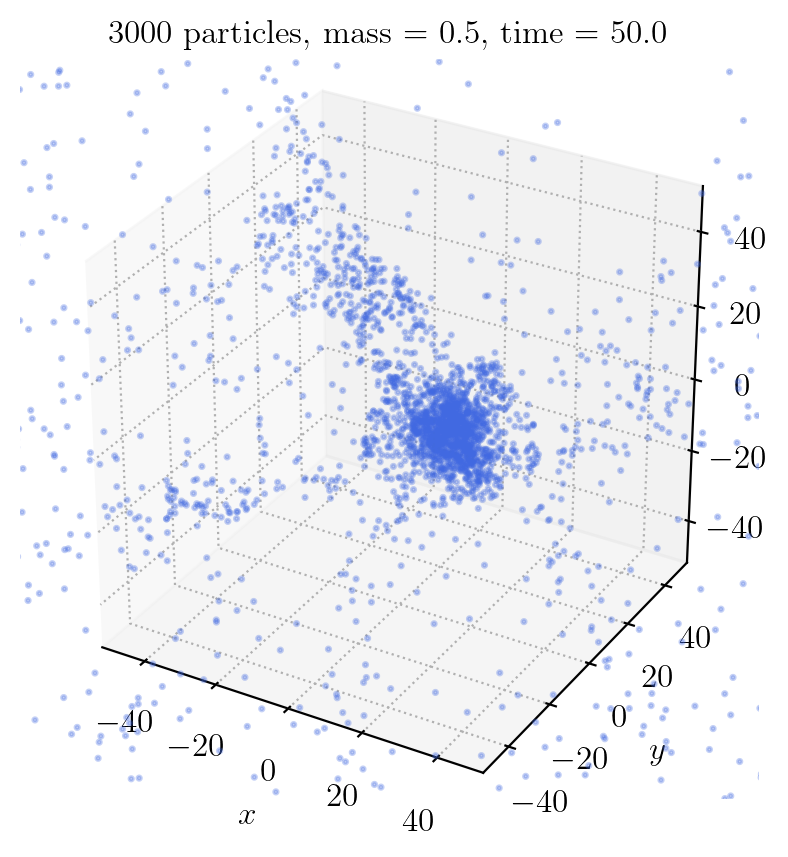

In [17]:
# simulation
from matplotlib import animation

def update(num):
    N = len(m)   #N_particles
    l = 50
    ax.clear()
    
    ax.scatter(x_s[:,num-1], y_s[:,num-1], z_s[:,num-1], color = 'royalblue', s = 2.5 ,alpha = .3)        # Updating Point Location

    ax.set_title(f'{N} particles, mass = {m[0,0]}, time = {round(t[num],1)}')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_zlabel(r'$z$')
    
    ax.set_xlim(-l, l)
    ax.set_ylim(-l, l)
    ax.set_zlim(-l, l)
    

## Plotting the Animation
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set(aspect='equal')
line_ani = animation.FuncAnimation(fig, update, interval=1,   
                                   frames=tqdm(range(len(t_s))))

# Saving the Animation
f = r"sphere.gif"
writergif = animation.PillowWriter(fps=30)
line_ani.save(f, writer=writergif)

plt.show()